# Analysis of Police Shootings in America | Mahir Piyarali

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Analysis 1

### Black and White

The first thing I wanted to look at within this data was the comparison between the amount of shootings of african americans and the amount of shootings of white people. I then also wanted to take those percentages and compare them to the census data for each race, and see if the amount of shootings per race are representative of the racial makeup of our country. I received census data from: http://worldpopulationreview.com/countries/united-states-population/.

#### Dataset Preparation

In [65]:
shootingdata = pd.read_csv("added1.csv",encoding="latin1")
racepcts = pd.read_csv("racestats.csv",encoding="latin1") #csv of census race stats
shootingdata.sort_values(by=["State","Victim's race"],inplace=True)
#the following code isolates the amount of deaths per state into a list so we can then correlate with the amount of deaths per race
racesdata = shootingdata.groupby(["Victim's race"]).size().reset_index(name="Deaths")
racesdata
totaldeaths = sum(racesdata["Deaths"])
tota = []
for amt in racesdata["Deaths"]: #this for loop calculates the percentage of deaths of each race (_% of shootings were of asians)
    tot = amt / totaldeaths
    tota.append(tot)
tota[:]
bkpct = round((tota[1]*100),2) #because the races are in alphabetical order, the black % is in the second row (1 in python)
wtpct = round((tota[6]*100),2)# " " " " " " " " white % is in the seventh row (6 in python)
totaa = []
for pct in racepcts["pct"]:
    totaa.append(pct)

#### Data Modeling

In [66]:
USbkpct = totaa[1]*100
USwtpct = totaa[0]*100
print(USbkpct,"% of americans are black;",bkpct,"% of people shot by police are black")
print(USwtpct,"% of americans are white;",wtpct,"% of people shot by police are white")

12.6 % of americans are black; 27.03 % of people shot by police are black
72.4 % of americans are white; 44.5 % of people shot by police are white


These results show that, as a whole, black people have a higher percent chance of getting shot by the police opposed to a white person.

## Analysis 2

### Black and White, in the South

I wanted to do was to look at the percentage of shootings that happened in Southeast of the United States compared with the percentage of shootings that occured in the rest of the country, and to compare african american percentages and white people percentages. I wanted to do this comparison to see if some of the stereotypes about aggressive policing being in the south is true or not. Because there are no specific boundaries that define the region of the "southeast", so in order to choose the 11 teams I looked at the schools in the SEC (southeastern athletic conference), and the states represented in the conference are what I used to determine the states.

#### Dataset Preparation

In [67]:
#this code isolates the racial breakdown within the SE
southdata = pd.read_csv("south.csv",encoding="latin1") #new csv with the info of the 11 southern states
southdata.sort_values(by=["State"],inplace=True)
southstate = southdata.groupby(["State","Victim's race"]).size().reset_index(name="Deaths")
ssrace = southdata.groupby(["Victim's race"]).size().reset_index(name="Deaths")
ssrace
#the next code created variables for the amount of black deaths and the amount of white
souct = []
for ct in ssrace["Deaths"]:
    souct.append(ct)
blkSEct = souct[1]
wtSEct = souct[6]
SEsum = sum(ssrace["Deaths"])
#print(wtSEct)
#this code will read in a CSV of the SE states' population
sepopulation = pd.read_csv("sestpop.csv")
blkpoppercent = sepopulation["bpop pct"]
blkpoppct = round(((sum(blkpoppercent) / 11)*100),2)

#### Data Modeling

In [68]:
#this code will give us the percentages of total killings that were of black people
blkSEpct = round(((blkSEct/SEsum)*100),2)
print("the total percent of black people in the southeast is",blkpoppct,"and the percent of black people that were shot by cops in the southeast is",blkSEpct)

the total percent of black people in the southeast is 21.46 and the percent of black people that were shot by cops in the southeast is 32.03


This data confirms the notion that African Americans are more likely to get shot in the Southeast.

## Analysis 3

### Police Shootings By State vs. Gun Ownership Percentage By State

I chose to look at the comparison between the percentage of each state's population that owns a gun and the total amount of police shootings in that state. I chose to do this comparison without using race, age, gender, or any other variables. I chose to solely look at the total amount of shootings by state and the percentage of that state that owns a gun. For this analysis, I accessed gun ownership data from the Washington Post: http://www.washingtonpost.com/wp-srv/health/interactives/guns/ownership.html

#### Dataset Preparation

In [69]:
#the following code reads in the CSV with gun ownership information, then isolates the list of percentages for the plot
gunownerpctdata = pd.read_csv("gunownerpct.csv", encoding="latin-1")
percentages = gunownerpctdata["% that owns guns"]
#the following code isolates the amount of deaths per state, so we can compare with the gun owner stats per state
shootingdata.sort_values(by=["State"],inplace=True)
statedeaths = shootingdata.groupby(["State"]).size().reset_index(name="Deaths")
statelist = []
for count in statedeaths["Deaths"]:
    statelist.append(count)


#### Data Modeling

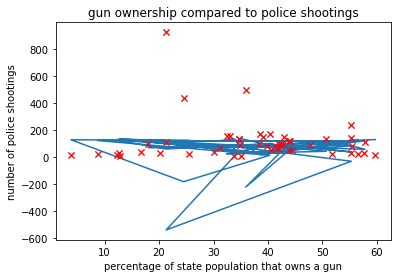

r: -0.0694432861688 , rsquared: 0.00482236999392 , slope: -0.736832477567


In [70]:
plt.plot(percentages, statelist, "rx") #making a scatterplot of deaths in state on xaxis, gun percentages on yaxis
plt.xlabel("percentage of state population that owns a gun")
plt.ylabel("number of police shootings")
plt.title("gun ownership compared to police shootings")
plt.show()
def best_fit(percentages, statelist):

    xbar = sum(percentages)/len(percentages)
    ybar = sum(statelist)/len(statelist)
    n = len(percentages) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(percentages, statelist)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in percentages]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar


    return a, b

# solution
a, b = best_fit(percentages, statelist)
plt.plot(percentages,statelist,"rx")
yfit = [a + b * xi for xi in statelist]
plt.plot(percentages,yfit)
x = percentages
y = statelist
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value,", rsquared:", r_value**2, ", slope:", slope)

It appears to be like there's no correlation between gun ownership and police shootings. There are a few outliers (with significantly more shootings than gun ownership %), but they don't look like they're skewing any results, as the scatter remains even.

## Final Results/Analysis

### Analysis 1 - Black vs. White
There's a sterotype that if someone is african american, they have a higher chance of getting shot by the cops. I decided to do an analysis computing the total percentage of police shootings that were of black people (27%) and white people (44.5%). I then decided to compare these percentages to the overall percent of black and white people in the entire US. Hopefully, we'd see the population percentages by race roughly match with the shootings. However, we see that America is only 12% black, but black people have a 27% chance of being shot. This means that, as an individual black person, they have a higher chance of getting shot by the police compared to an individual white person.

Though we've reached the conclusion that black people have a higher chance of getting shot compared to white people, there is one part of bias I want to mention. The US racial population data that I used were from the US census back in 2010. Though this isn't too outdated, there's a chance that the african american population in the US has gone up since then.

I do wish that, with more time and coding information, I could break down these percentages state by state.

### Analysis 2 - Black vs. White in SE
I wanted to dive further into the comparison of black and white deaths, but examime them in one specific region of the US; the southeast. Generally speaking the southeast of the united states is more racist, and more oppressive, than the rest of the country. To test this, I decided to isolate the percentages by race of each shooting in the 11 states that  I defined as the Southeast. I then isolated the black percentage of people shot (32%), and compared with the percentage of the south that's black (21%). This further confirmed the notion that african americans have a higher chance of being shot by cops.

I also don't see any bias in these results. Ms. Sconyers provided the state percentage data I used, and though I don't know *when* the data was recorded, I have no reason to believe it's false.

I do wish that, with more time and coding information, I could break down these percentages state by state.

### Analysis 3 - Gun Ownership
I wanted to next analyze if there's any correlation between the percent of each state's population who owns guns and their total number of police shootings. I created a scatterplot, and it shows that there actually is no correlation. With an r-value of -0.06, it shows that there is no relationship whatsoever between the percentage of each state that owns a gun, and that state's total number of police shootings.

I don't see any bias either, as all the information I recieved was reliable (gun owner data from Washington Post). 

I do wish that I could further break down these percentages by race, to see if being a certain race with a gun leads to more shootings.

## References

Ms. Sconyers
 - helped me get the groupby code that was integral to my project
Doran
 - gave me his code to create a line of best fit within a scatter plot


## External Sources

I got the gun owner % data per state from the washington post: http://www.washingtonpost.com/wp-srv/health/interactives/guns/ownership.html
I got the US census percentages from wikipedia: https://en.wikipedia.org/wiki/Demography_of_the_United_States
